# <center><font color = "green">PUBG GAME PREDICTION</font></center>

<center><img src = "https://media2.giphy.com/media/7iscZVCg0r1oYAqNdl/giphy.gif?cid=6c09b9526ihscd84y144to375g5ov21fvxacn84tw237swqd&ep=v1_gifs_search&rid=giphy.gif&ct=g"></center>

# Table of content

1 -Importing Libraries<br>
2 -Reading Data<br>
3 -Data Wrangling<br>
4 -Feature Engineering<br>
5 -ML - CatBoost Model<br>

In [5]:
# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns

# scaling
from sklearn.preprocessing import StandardScaler
# training
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
import catboost as cb

# Reading the data

In [8]:
data = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [9]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [10]:
data.shape

(4446966, 29)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [12]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### Data Description

- **DBNOs**: Number of enemy players knocked.
-a**Assists**: Number of enemy players this player damaged that were killed by teammates.
b **Boosts**: Number of boost items used.d- **DamageDealt**: Total damage dealt. Note: Self-inflicted damage is subtracted.h
- **HeadshotKills**: Number of enemy players killed with headshotsh
- **Heals**: Number of healing items usei.
- **Id**: Player’s kd.
- **KillPlace**: Ranking in match of number of enemy players kilked.
- **KillPoints**: Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “Nkne”.
- **KillStreaks**: Max number of enemy players killed in a short amount ofktime.
- **Kills**: Number of enemy players lilled.
- **LongestKill**: Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKiml stat.
- **MatchDuration**: Duration of match inmseconds.
- **MatchId**: ID to identify match. There are no matches that are in both the training and temting set.
- **MatchType**: String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custrm matches.
- **RankPoints**: Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes placr of “None”.
- **Revives**: Number of times this player revivrd teammates.
- **RideDistance**: Total distance traveled in vehicles measured in meters.
- **RoadKills**: Number of kills whils in a vehicle.
- **SwimDistance**: Total distance traveled by swimming meatured in meters.
- **TeamKills**: Number of times this player kvlled a teammate.
- **VehicleDestroys**: Number of vwhicles destroyed.
- **WalkDistance**: Total distance traveled on foot weasured in meters.
- **WeaponsAcquired**: Number ow weapons picked up.
- **WinPoints**: Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should begtreated as a “None”.
- **GroupId**: ID to identify a group within a match. If the same group of players plays in different matches, they will have a differnnt groupId each time.
- **NumGroups**: Number of groups we havemdata for in the match.
- **MaxPlace**: Worst placement we have data for in the match. This may not match with numGroups, as sometimes the datw skips over placements.
- **WinPlacePerc**: The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


# Data Wrangling

In [15]:
# check row with null wining percentage 
data['winPlacePerc'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: winPlacePerc, Length: 4446966, dtype: bool

In [16]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [17]:
data.drop(2744604,inplace = True)

#### understanding players distribution in a game 

In [19]:
# Preparing new parameter to know how many players are in a game 
data['Playersjoined'] = data.groupby('matchId')['matchId'].transform('count')

In [20]:
data.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


#### Analyzing the data

kills without moving?

In [23]:
# preparing a new parameter to store the total distance traveled in the game 
data['totalDistance'] = data["rideDistance"] + data['walkDistance'] + data['swimDistance']

data['killswithoutMoving'] = ((data['kills']>0)&(data['totalDistance']==0))

In [24]:
data[data['killswithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [25]:
data[data['killswithoutMoving']==True].shape

(1535, 32)

In [26]:
data.drop(data[data['killswithoutMoving']==True].index, inplace = True) # .index is done to get the index of that row 

##### A lot number of kills using vehicle 

<center><img src="https://gifdb.com/images/thumbnail/super-car-kill-pubg-online-game-630pabl6tzjs8nne.gif"></center>

In [29]:
data[data['roadKills']>5].shape

(46, 32)

In [30]:
data.drop(data[data['roadKills']>5].index, inplace = True)

In [31]:
data[data['roadKills']>5].shape

(0, 32)

#### So many kills??

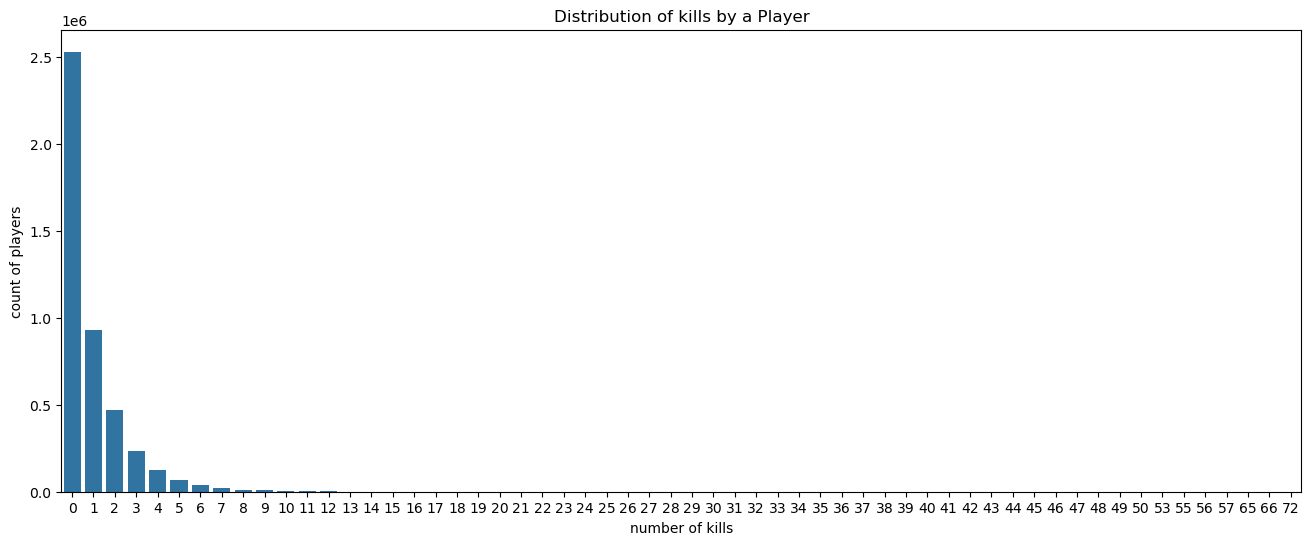

In [33]:
sns.countplot(data = data,x = data['kills']).set_title("Distribution of kills by a Player")
plt.ylabel("count of players")
plt.xlabel("number of kills")
plt.show()

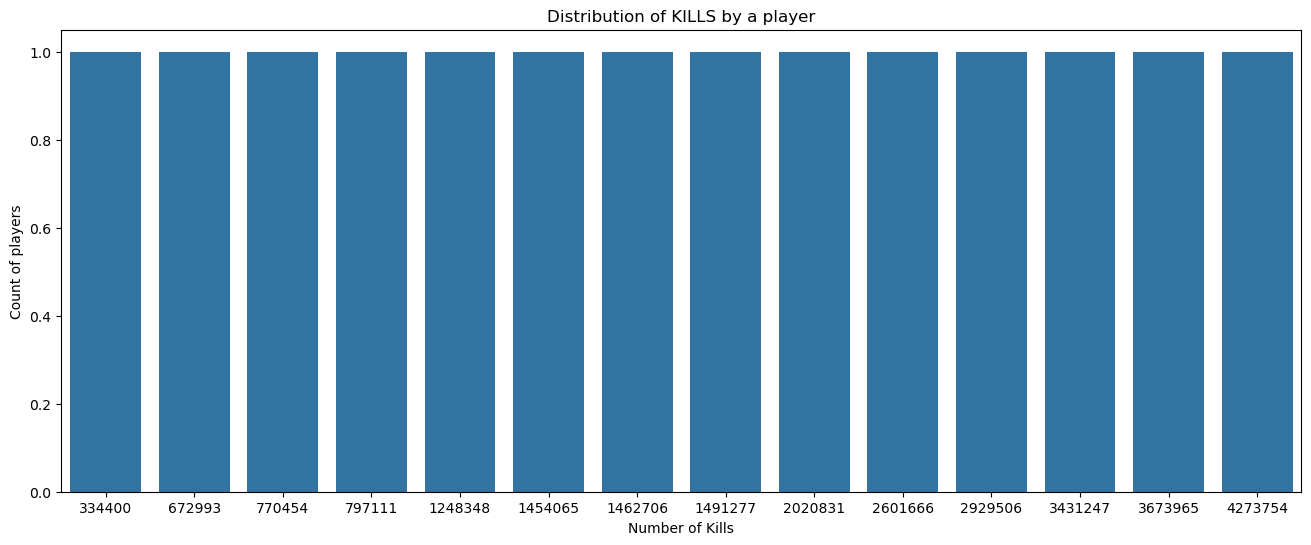

In [34]:
sns.countplot(data[data['kills']>=50]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [35]:
data[data['kills']>20].shape

(417, 32)

In [36]:
data.drop(data[data['kills']>20].index,inplace = True)

In [37]:
data[data['kills']>20].shape

(0, 32)

#### Head Shot

In [39]:
# we have made a parameter to store headshot_rate 
data['headshot_rate'] = data['headshotKills']/data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)  # values for which headshot rate is not defined ie if kills are zero then we will fill it with 0 

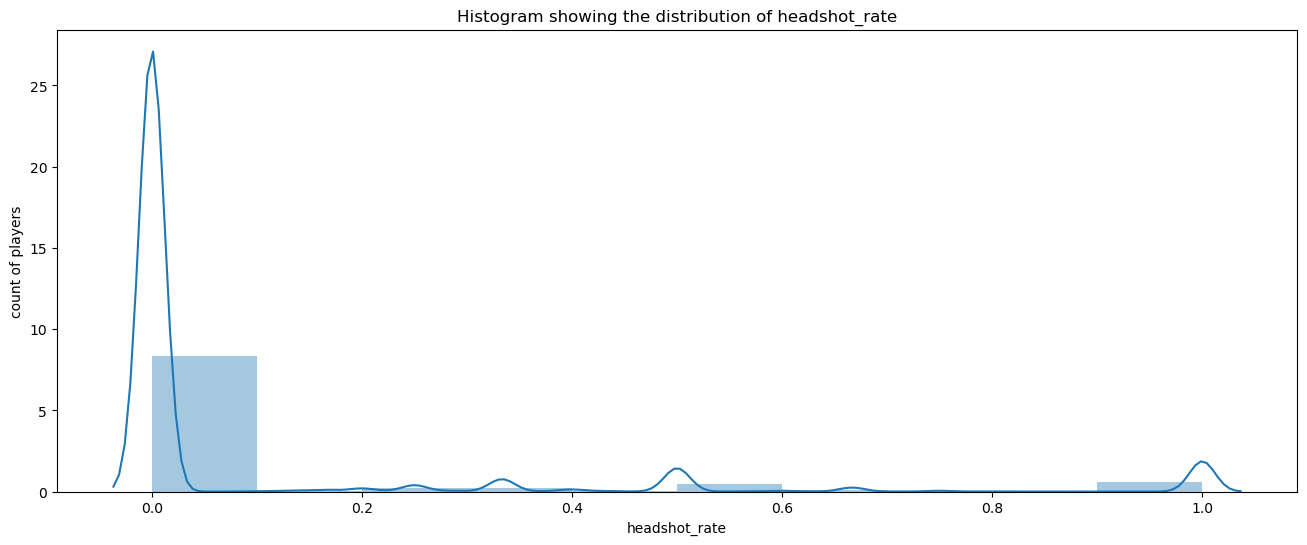

In [40]:
sns.distplot(data['headshot_rate'],bins=10).set_title("Histogram showing the distribution of headshot_rate")
plt.ylabel("count of players")
plt.show()

headshot_rate ==1 ie all shots are headshots for some large number of kills is not fair

In [42]:
data[(data['headshot_rate']==1)&(data['kills']>5)].shape

(187, 33)

In [43]:
data[(data['headshot_rate']==1)&(data['kills']>5)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined,totalDistance,killswithoutMoving,headshot_rate
43791,9afbe8ecaec518,19215cc89a51d7,0c70c2be6426f5,0,0,959.4,8,7,0,1,...,0,0,1823.0,4,0,0.5833,90,2824.0,False,1.0
45447,eb5516fd4df6fe,45c62861949040,6f46cd41d884d8,0,4,740.5,0,6,2,3,...,0,0,4403.0,4,0,0.9896,97,4403.0,False,1.0
66266,1a23298ecdb19d,d5d54b4be23079,e111ebb6185bc8,0,4,1469.0,9,8,0,2,...,0,0,2107.0,6,0,0.7200,94,4864.0,False,1.0
102499,d897450a550371,597f96e4f44ab8,afd45aeba13205,1,1,689.0,0,7,3,16,...,0,0,2421.0,12,1500,0.5806,32,4078.0,False,1.0
104571,cbebfd04b26842,90d0154538dfa3,b0a10671999dc9,0,4,1153.0,0,8,2,1,...,0,0,1898.0,4,1513,0.8780,83,3806.0,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408299,8c570d2fd6e771,671309d084cff4,81a1f3c91bdab3,0,11,881.2,7,9,2,1,...,0,0,3346.0,5,1556,0.8696,84,3346.0,False,1.0
4417654,e7693e6b92103b,b2a636d71aaea5,e7351dcf720ada,2,7,1083.0,7,7,6,3,...,0,0,2728.0,3,0,1.0000,93,7143.0,False,1.0
4428741,6892bbc8af99e3,1fdc1da60d6247,69f854bbfdf3a2,0,3,1180.0,7,12,1,1,...,0,0,1874.0,5,0,0.9375,96,1874.0,False,1.0
4433196,adcae24897f155,7f94e84d7c089d,bece980540324d,0,1,600.0,2,6,0,5,...,0,0,4875.0,3,0,0.7917,95,5182.0,False,1.0


In [44]:
data.drop(data[(data['headshot_rate']==1)&(data['kills']>6)].index,inplace = True)

In [45]:
data[(data['headshot_rate']==1)&(data['kills']>6)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined,totalDistance,killswithoutMoving,headshot_rate


all the such ambiguous rows are dropped

#### cleaning data based on longest shot 

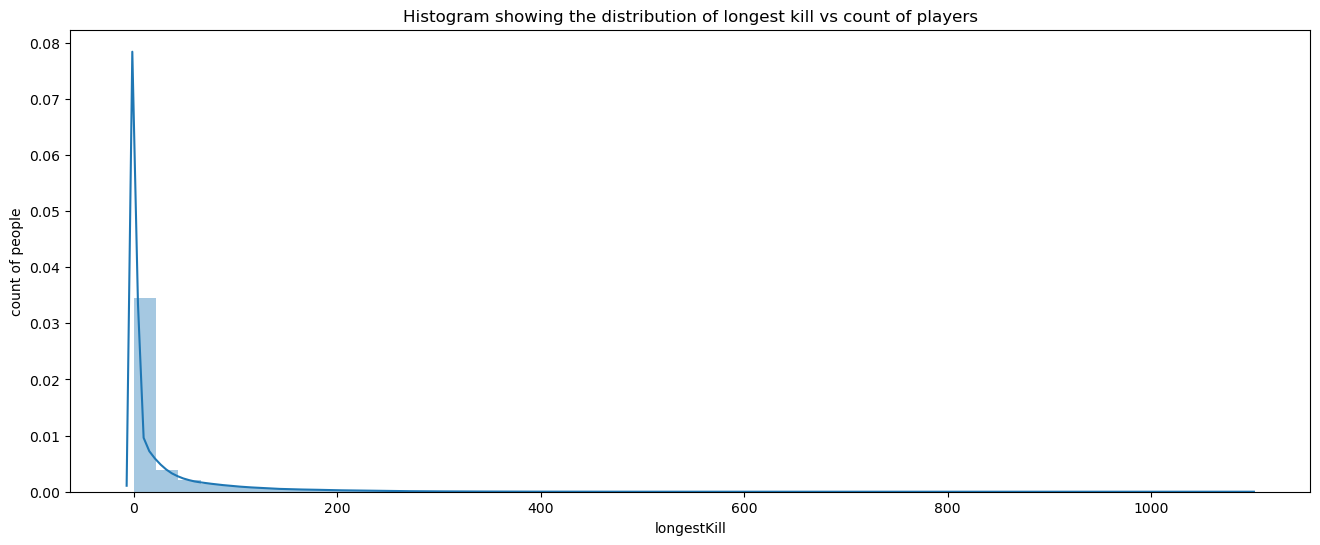

In [48]:
sns.distplot(data['longestKill'],bins =50).set_title("Histogram showing the distribution of longest kill vs count of players")
# bin = 50 denotes that each bin covers an interval of 0.5 in the longest kill scale 
plt.ylabel("count of people")
plt.show()

In [49]:
data[data['longestKill']>=500]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined,totalDistance,killswithoutMoving,headshot_rate
4538,03313d3ed6011d,889425599a132c,c14a056614e5bb,1,8,745.5,5,0,3,2,...,0,0,4211.0,7,1600,1.0000,94,4861.5,False,0.000000
25333,18c0f228f7eb01,5f93b9406c7ee8,6b145e65f6fd9a,0,3,253.9,0,1,4,17,...,0,1,937.0,3,0,0.6957,93,5096.0,False,0.500000
29129,5f0b20b61f68bb,5f25d16a135358,14c2e951e9949c,0,8,752.7,0,5,0,1,...,0,0,2145.0,7,0,1.0000,96,5675.0,False,0.625000
41358,93a33892b67bc5,7e68d03ac6ad0e,fab0eaec927962,0,2,306.9,2,0,2,10,...,0,0,4337.0,6,0,0.6296,97,4337.0,False,0.000000
43529,8990b15c293089,1a14bfaa9a8edf,d4bf97e8529d01,0,8,331.5,3,1,16,9,...,0,0,1911.0,8,0,0.6444,89,3501.0,False,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435955,e59c6778223a95,04672b08f6f03d,029ae9fb70875a,1,4,402.6,3,2,6,7,...,0,0,2597.0,6,0,1.0000,98,2776.0,False,0.666667
4436217,523d77cb0fec62,9ff5b8f3410d1e,375628d33dde21,1,3,247.5,1,0,3,30,...,0,0,2098.0,5,0,0.6667,92,3800.0,False,0.000000
4436871,67e874bcc561cc,6168ec46c60c65,06f72cfe9273eb,4,3,420.1,1,1,1,4,...,0,0,4955.0,6,0,1.0000,88,4955.0,False,0.250000
4438550,8f3cd1521dd146,ec2608ca2b2f32,f892f5140a95ae,4,3,858.7,3,1,5,2,...,0,0,2860.0,6,1502,0.8333,97,2860.0,False,0.111111


In [50]:
data[data['longestKill']>=500].shape

(1747, 33)

In [51]:
data.drop(data[data['longestKill']>=500].index, inplace = True)

In [52]:
data[data['longestKill']>=500].shape

(0, 33)

#### how many times weapon is changes

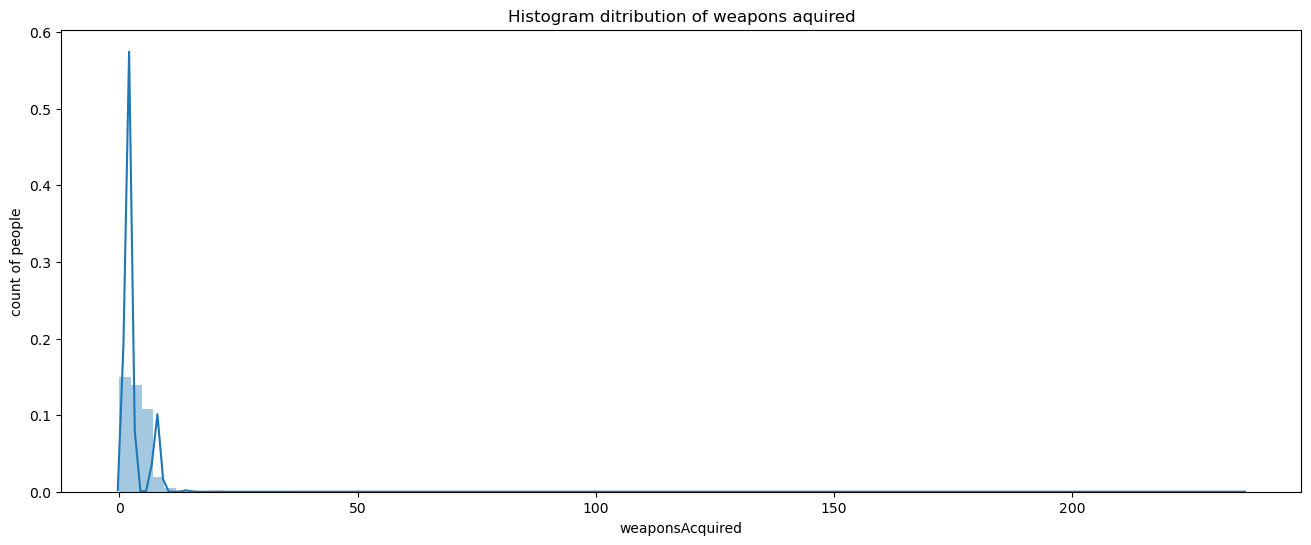

In [54]:
sns.distplot(data['weaponsAcquired'],bins =100).set_title("Histogram ditribution of weapons aquired")
plt.ylabel("count of people")
plt.show()

In [55]:
data[data['weaponsAcquired']>=15].shape

(6809, 33)

In [56]:
data.drop(data[data['weaponsAcquired']>=15].index , inplace = True)

In [57]:
data[data['weaponsAcquired']>=15].shape

(0, 33)

we above have removed all the data that could correspond to hacking and ambiguous things in the game

# EDA(Exoloratory Data analysis)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436306 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   groupId             object 
 2   matchId             object 
 3   assists             int64  
 4   boosts              int64  
 5   damageDealt         float64
 6   DBNOs               int64  
 7   headshotKills       int64  
 8   heals               int64  
 9   killPlace           int64  
 10  killPoints          int64  
 11  kills               int64  
 12  killStreaks         int64  
 13  longestKill         float64
 14  matchDuration       int64  
 15  matchType           object 
 16  maxPlace            int64  
 17  numGroups           int64  
 18  rankPoints          int64  
 19  revives             int64  
 20  rideDistance        float64
 21  roadKills           int64  
 22  swimDistance        float64
 23  teamKills           int64  
 24  vehicleDestroys     int64  
 

#### we can se above that the size of our data is decreased a lot bcs of those eleminations

In [62]:
data.shape

(4436306, 33)

In [63]:
data.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
Playersjoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

data.isnull().sum()

# correlation of parameter with win prediction
plt.figure(figsize = [30,30])
sns.heatmap(data.corr(),annot = True)
plt.show()

# Feature engineering 

In [67]:
normalising_factor = (100 - data['Playersjoined']/100)+1

In [68]:
data['killsNorm'] = data['kills'] * normalising_factor
data['damageDealtNorm'] = data['damageDealt'] * normalising_factor
data['maxPlaceNorm'] = data['maxPlace'] * normalising_factor
data['matchDurationNorm'] = data['matchDuration'] * normalising_factor


data['traveldistance'] = data['walkDistance'] + data['swimDistance'] + data['rideDistance']
data['healsnboosts'] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']

In [69]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'Playersjoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [70]:
data = data.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [71]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# Catboost Model

#### Handling categorical data 

In [74]:
x = data.drop(['winPlacePerc'],axis =1)
y = data['winPlacePerc']

In [75]:
x['matchType'].dtype

dtype('O')

In [76]:
print(x['matchType'].unique())

['squad-fpp' 'duo' 'solo-fpp' 'squad' 'duo-fpp' 'solo' 'normal-squad-fpp'
 'crashfpp' 'flaretpp' 'normal-solo-fpp' 'flarefpp' 'normal-duo-fpp'
 'normal-squad' 'crashtpp' 'normal-solo' 'normal-duo']


In [77]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [78]:
x['killswithoutMoving'].dtype

dtype('bool')

In [79]:
x['killswithoutMoving'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: killswithoutMoving, Length: 4436306, dtype: bool

In [80]:
x['killswithoutMoving'].isnull().sum()

0

In [81]:
x['killswithoutMoving'] = x['killswithoutMoving'].astype(int)

In [82]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,0,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,0,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,0,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,0,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,0,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [83]:
print(x['matchType'].head())

0    squad-fpp
1    squad-fpp
2          duo
3    squad-fpp
4     solo-fpp
Name: matchType, dtype: object


In [84]:
x.isnull().sum()

DBNOs                 0
headshotKills         0
killPlace             0
killPoints            0
killStreaks           0
longestKill           0
matchType             0
numGroups             0
rankPoints            0
roadKills             0
teamKills             0
vehicleDestroys       0
weaponsAcquired       0
winPoints             0
Playersjoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
killsNorm             0
damageDealtNorm       0
maxPlaceNorm          0
matchDurationNorm     0
traveldistance        0
healsnboosts          0
assist                0
dtype: int64

In [85]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

print("Initial null values in the DataFrame:")
print(x.isnull().sum())

Initial null values in the DataFrame:
DBNOs                 0
headshotKills         0
killPlace             0
killPoints            0
killStreaks           0
longestKill           0
matchType             0
numGroups             0
rankPoints            0
roadKills             0
teamKills             0
vehicleDestroys       0
weaponsAcquired       0
winPoints             0
Playersjoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
killsNorm             0
damageDealtNorm       0
maxPlaceNorm          0
matchDurationNorm     0
traveldistance        0
healsnboosts          0
assist                0
dtype: int64


In [86]:
# Proceed with one-hot encoding
encoder = OneHotEncoder()
match_types_encoded = encoder.fit_transform(x[['matchType']])

In [87]:
# Get feature names based on categories
feature_names = encoder.get_feature_names_out(['matchType'])

In [88]:
match_types_encoded_df = pd.DataFrame(match_types_encoded.toarray(), columns=feature_names,index=x.index)

In [89]:
# Check for null values in the encoded DataFrame
print("Null values in encoded DataFrame:")
print(match_types_encoded_df.isnull().sum())

Null values in encoded DataFrame:
matchType_crashfpp            0
matchType_crashtpp            0
matchType_duo                 0
matchType_duo-fpp             0
matchType_flarefpp            0
matchType_flaretpp            0
matchType_normal-duo          0
matchType_normal-duo-fpp      0
matchType_normal-solo         0
matchType_normal-solo-fpp     0
matchType_normal-squad        0
matchType_normal-squad-fpp    0
matchType_solo                0
matchType_solo-fpp            0
matchType_squad               0
matchType_squad-fpp           0
dtype: int64


In [90]:
# Check for null values in original DataFrame before concatenation
print("Null values in the original DataFrame before concatenation:")
print(x.isnull().sum())

Null values in the original DataFrame before concatenation:
DBNOs                 0
headshotKills         0
killPlace             0
killPoints            0
killStreaks           0
longestKill           0
matchType             0
numGroups             0
rankPoints            0
roadKills             0
teamKills             0
vehicleDestroys       0
weaponsAcquired       0
winPoints             0
Playersjoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
killsNorm             0
damageDealtNorm       0
maxPlaceNorm          0
matchDurationNorm     0
traveldistance        0
healsnboosts          0
assist                0
dtype: int64


In [91]:
# Concatenate encoded columns back to original DataFrame and drop the original matchType column
x =pd.concat([x, match_types_encoded_df], axis=1).drop(['matchType'], axis=1)

In [92]:
x.shape

(4436306, 40)

In [93]:
x.isnull().sum()

DBNOs                         0
headshotKills                 0
killPlace                     0
killPoints                    0
killStreaks                   0
longestKill                   0
numGroups                     0
rankPoints                    0
roadKills                     0
teamKills                     0
vehicleDestroys               0
weaponsAcquired               0
winPoints                     0
Playersjoined                 0
totalDistance                 0
killswithoutMoving            0
headshot_rate                 0
killsNorm                     0
damageDealtNorm               0
maxPlaceNorm                  0
matchDurationNorm             0
traveldistance                0
healsnboosts                  0
assist                        0
matchType_crashfpp            0
matchType_crashtpp            0
matchType_duo                 0
matchType_duo-fpp             0
matchType_flarefpp            0
matchType_flaretpp            0
matchType_normal-duo          0
matchTyp

In [94]:
x.shape

(4436306, 40)

In [95]:
features = x.columns

#### Scaling the data

In [97]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [98]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.005697,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.005697,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.005697,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.005697,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.005697,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936


#### splitting data

In [100]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.3, random_state =0)

In [101]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 40) (3105414,)
(1330892, 40) (1330892,)


# Starting the Catboost Model

In [103]:
import catboost as cb

In [104]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [105]:
model = cb.CatBoostRegressor(loss_function ='RMSE')

In [ ]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 280ms	remaining: 27.7s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 392ms	remaining: 19.2s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 500ms	remaining: 16.2s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 613ms	remaining: 14.7s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 733ms	remaining: 13.9s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 856ms	remaining: 13.4s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 989ms	remaining: 13.1s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 1.11s	remaining: 12.7s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 1.22s	remaining: 12.3s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 1.33s	remaining: 12s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 1.44s	remaining: 11.7s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765 (

In [ ]:
feature_importance_data = pd.DataFrame()
feature_importance_data['features'] = features
feature_importance_data['importance'] = model.feature_importances_

feature_importance_data = feature_importance_data.sort_values(by = ['importance'],ascending = False)

In [ ]:
feature_importance_data

In [ ]:
plt.bar(feature_importance_data.features, feature_importance_data.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

# Prediction

In [ ]:
pred = model.predict(xtest)

In [ ]:
ytest[:10]

In [ ]:
pred[:10]

In [ ]:
rmse = np.sqrt(mean_squared_error(ytest,pred))
r2 = r2_score(ytest,pred)

print("Testing Performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

**This is how we are done with our model predicting the chances of survival of a person in the game based upon the train and test data using the CatBoost model**

<center><img src = "https://media.tenor.com/di4Wmc5J6LQAAAAM/chicken-dinner.gif"></center>

<center><img src = "https://media.tenor.com/qzrlJafsBdYAAAAM/winner-winner-chicken-dinner-win.gif"></center>